# Visualizando dados com python

**Author:** Ties de Kok ([Personal Website](http://www.tiesdekok.com))

**Last updated:** 18 May 2018 

**Python version:** Python 3.6 

**License:** MIT License 

# *Introdução*

There are many ways to create data visualizations in Python. Too many to cover in this notebook, so I will show the packages that I like to use.

A basic distinction can be made between packages that use `matplotlib` in the background and packages that do not. 

Há muitas maneiras de criar visualizações de dados no Python. Seá mostrado alguns

Uma distinção básica pode ser feita entre os pacotes que usam o `matplotlib` no background e os pacotes que não usam.

## Imports

**Observação:** Se querermos que as visualizações apareçam no Jupyter notebook, precisamos adicionar isso ao início do notebook:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Como ponto de partida, usaremos dados armazenados como um dataframe/série Pandas ou um Numpy array .

In [2]:
import pandas as pd
import numpy as np

A maioria dos pacotes usa matplotlib em segundo plano, então vale a pena importar também

In [3]:
import matplotlib.pyplot as plt

Por conveniência nós também importamos `join` para criar facilmente caminhos:

In [4]:
import os
from os.path import join

### Parâmetros

In [5]:
data_path = join(os.getcwd(), 'Dados')

### Carregue alguns dados de exemplo

Para detalhes sobre como abrir arquivos como Excel, CSV, Stata, SAS, HDF, veja o notebook [Opening_files.ipynb](Opening_files.ipynb)

In [6]:
df_auto = pd.read_csv(join(data_path, 'auto_df.csv'), sep=';', index_col='Unnamed: 0')

## Visualizações rápidas usando Pandas e Matplotlib

Referência: <http://pandas.pydata.org/pandas-docs/stable/visualization.html>

O Pandas já vem com funcionalidades adicionais para transformar dados em um DataFrame em uma visualização `matplotlib`.

Você pode criar ótimas visualizações usando essas funções básicas, mas exige que você transforme os dados na entrada direta para um gráfico.

O pacote `Seaborn` é algumas vezes mais fácil, já que ele pode cuidar de algumas dessas transformações para você.

### Gráfico de Barras

Referência: <http://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots>

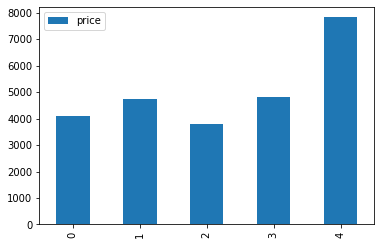

In [7]:
df_auto.iloc[0:5][['price']].plot.bar()

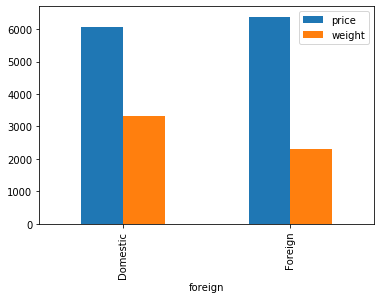

In [8]:
df_auto.groupby(['foreign']).mean()[['price', 'weight']].plot.bar()

### Histograma

Referência: <http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms>

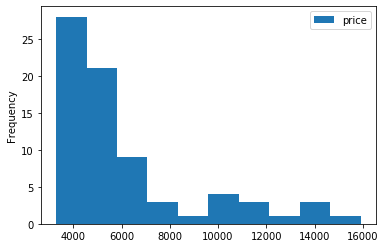

In [9]:
df_auto[['price']].plot.hist()

### Gráficos de caixas

Referência: <http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots>

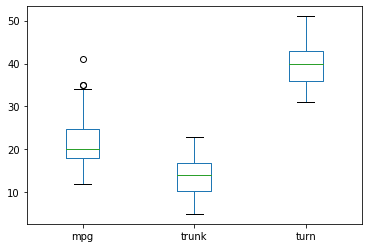

In [10]:
df_auto[['mpg', 'trunk', 'turn']].plot.box()

### Gráfico de pontos

Referência: <http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot>

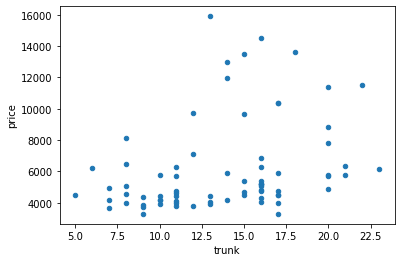

In [11]:
df_auto.plot.scatter(x='trunk', y='price')

### Gráfico de pizza 

Referência: <http://pandas.pydata.org/pandas-docs/stable/visualization.html#pie-plot>

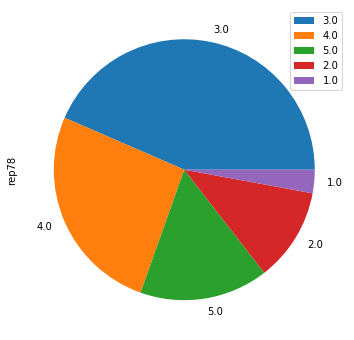

In [12]:
df_auto['rep78'].value_counts().plot.pie(figsize=(6, 6), legend=True)

### Crie uma visualização em uma série aleatória (a partir de docs)

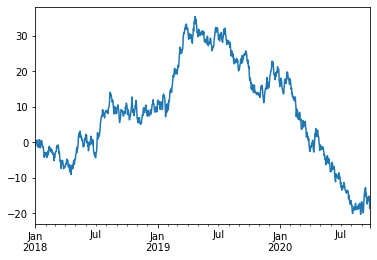

In [13]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2018', periods=1000))
ts = ts.cumsum()
ts.plot()

## Façzer gráficos usando o pacote  `Seaborn` 

O pacote `Seaborn` é um pacote realmente incrível para criar visualizações para os dataframes do Pandas:
> https://seaborn.pydata.org/index.html

Se você usa uma versão recente da distribuição do Anaconda, ela vem pré-instalada com seaborn. Se você tem uma versão mais antiga do Anaconda, pode ser necessário instalá-lo usando:
> `pip instalar seaborn`

O principal benefício do Seaborn é que ele cuida de algumas das etapas de transformação para você. Além disso, ele possui alguns recursos adicionais para tornar seus gráficos mais agradáveis esteticamente.

In [14]:
import seaborn as sns

## Mude a aparência das suas visualizações Seaborn

### Defina o estilo

O `Seaborn` vem com uma variedade de temas incorporados: `darkgrid`,` whitegrid`, `dark`,` white` e `ticks`.
<https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles>

Esta função (da documentação) cria alguns dados aleatórios para mostrar os diferentes estilos:

In [15]:
def sinplot(flip=1):
    x = np.linspace(0, 6*np.pi, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

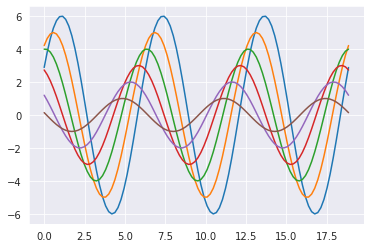

In [16]:
sns.set_style("darkgrid")
sinplot()

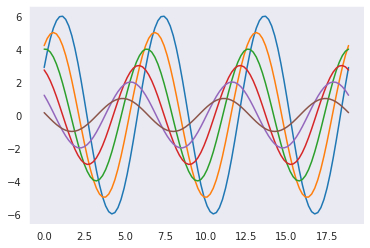

In [17]:
sns.set_style("dark")
sinplot()

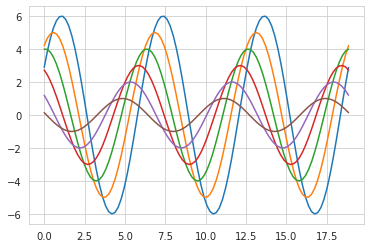

In [18]:
sns.set_style("whitegrid")
sinplot()

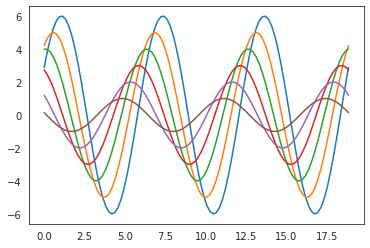

In [19]:
sns.set_style("white")
sinplot()

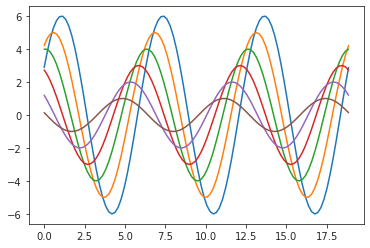

In [20]:
sns.set_style("ticks")
sinplot()

It is also possible to remove the 'spine' by using `sns.despine()`:

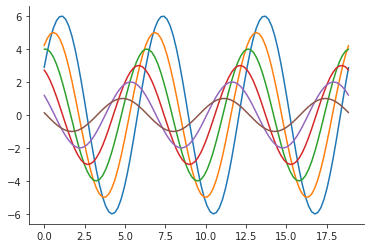

In [21]:
sinplot()
sns.despine()

### Defina as cores

As cores podem fazer uma grande diferença quando se trata da aparência de um visual. Veja os detalhes aqui:
<https://seaborn.pydata.org/tutorial/color_palettes.html>

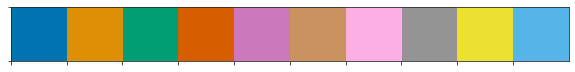

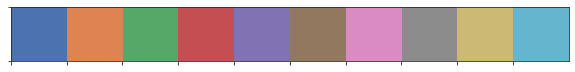

In [22]:
colorblind_palette = sns.color_palette('colorblind')
deep_palette = sns.color_palette('deep')

sns.palplot(colorblind_palette)
sns.palplot(deep_palette)

Pode-se passar essas paletas de cores para sua função que fará os gráficos.

## Vários exemplos do Seaborn

### Histograma

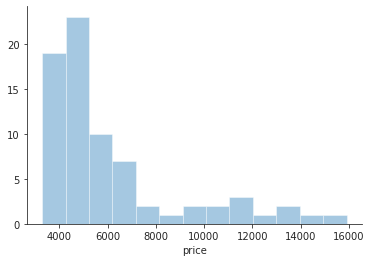

In [23]:
sns.distplot(df_auto['price'], kde=False)
sns.despine()

### Gráfico de pontos

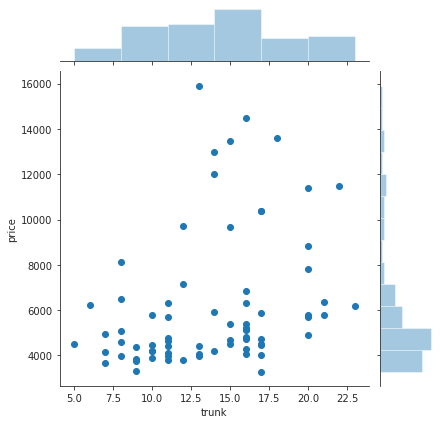

In [24]:
sns.jointplot(x="trunk", y="price", data=df_auto)

### Correlações entre pares

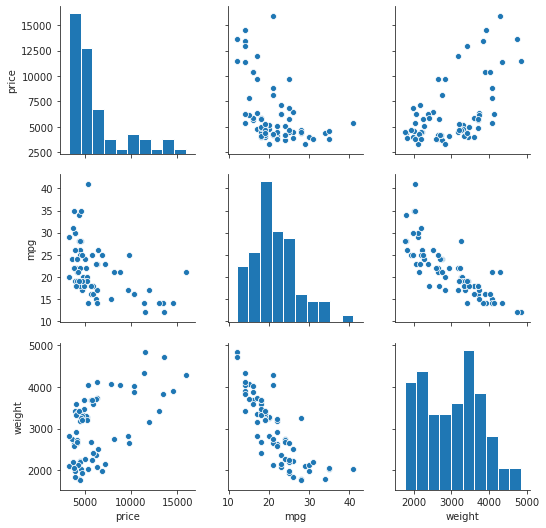

In [25]:
sns.pairplot(df_auto[['price', 'mpg', 'weight']])

### Plotting categorical data

### Fazendo gráfico de dados por categoria

Vamos criar algumas colunas categóricas:

In [26]:
df_auto['brand'] = [x.split(" ")[0] for x in df_auto['make']]
df_auto['headroom'] = ['big' if x > 2.5 else 'small' for x in df_auto['headroom']]
df_auto['weight_cat'] = pd.qcut(df_auto['weight'].values, 12, labels=range(0,12))

In [27]:
df_auto.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,brand,weight_cat
0,AMC Concord,4099,22,3.0,small,11,2930,186,40,121,3.58,Domestic,AMC,5
1,AMC Pacer,4749,17,3.0,big,11,3350,173,40,258,2.53,Domestic,AMC,7
2,AMC Spirit,3799,22,NaN,big,12,2640,168,35,121,3.08,Domestic,AMC,3
3,Buick Century,4816,20,3.0,big,16,3250,196,40,196,2.93,Domestic,Buick,6
4,Buick Electra,7827,15,4.0,big,20,4080,222,43,350,2.41,Domestic,Buick,11


### Gráfico de Barras

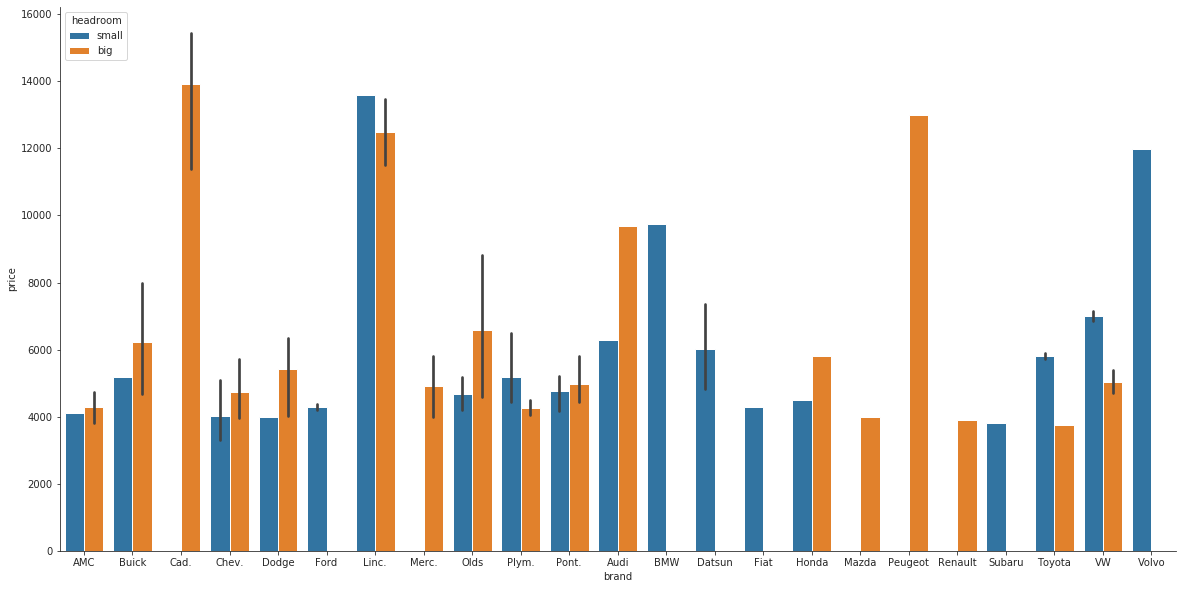

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x="brand", y="price", hue="headroom", data=df_auto)
sns.despine()

**Nota:** Poderíamos passar uma paleta daltônica para este gráfico, como por exemplo:

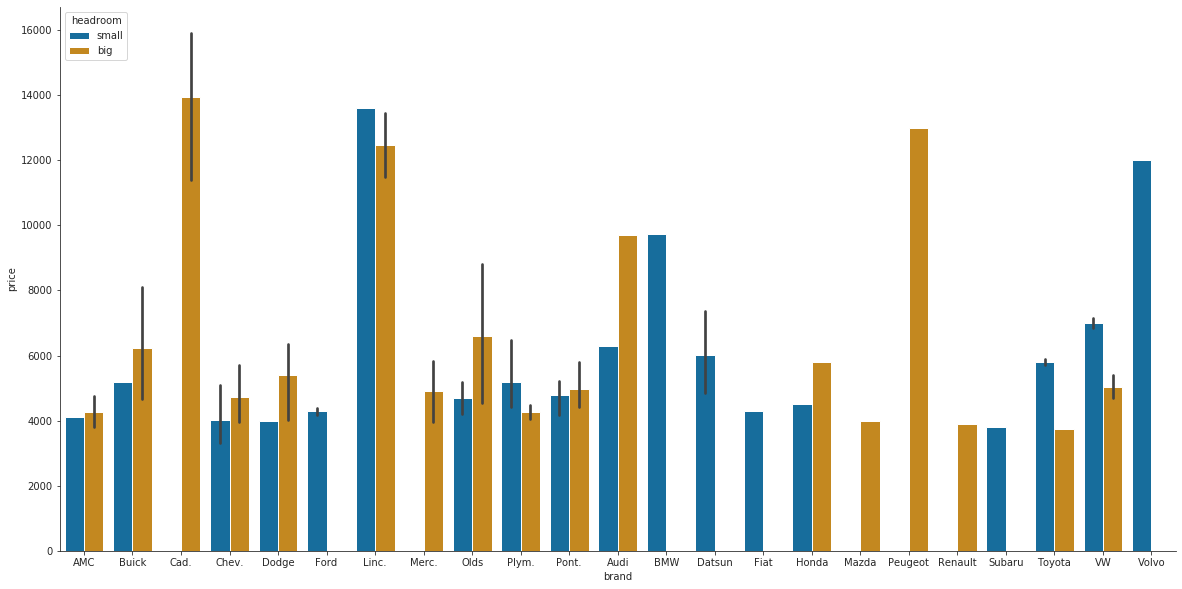

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x="brand", y="price", hue="headroom", data=df_auto, palette=colorblind_palette)
sns.despine()

### Gráfico de contagem

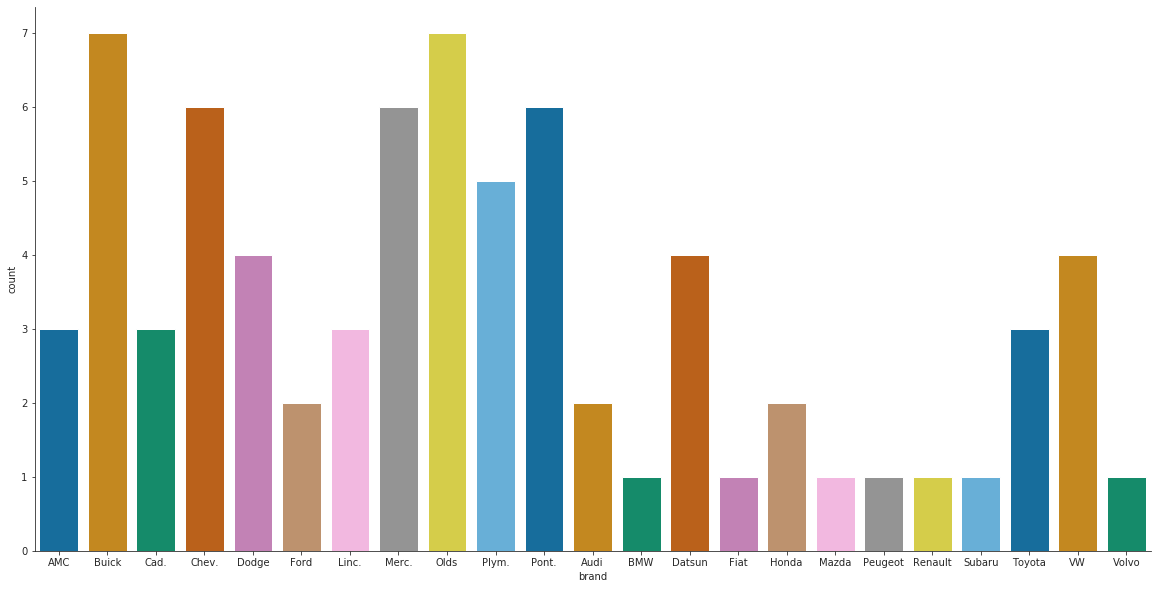

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x="brand", data=df_auto, palette=colorblind_palette)
sns.despine()

### Gráfico de pontos

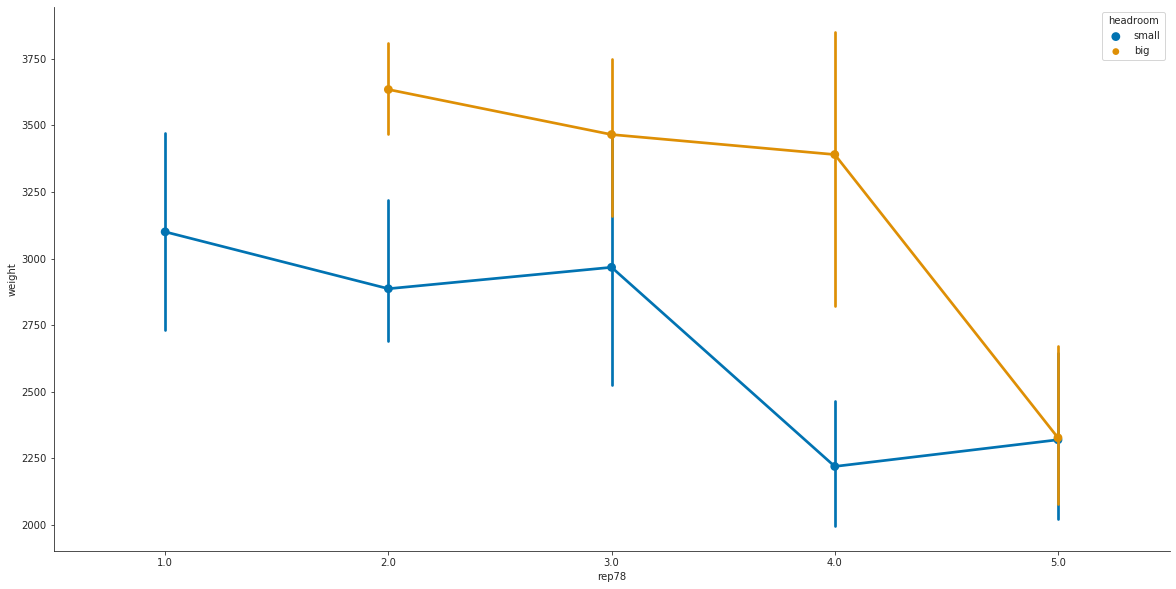

In [31]:
plt.figure(figsize=(20,10))
sns.pointplot(x="rep78", y="weight", hue='headroom',data=df_auto, palette=colorblind_palette)
sns.despine()

## Grade Seaborn

Um recurso poderoso do `Seaborn` é a capacidade de criar uma grade de visualização com vários gráficos.

<https://seaborn.pydata.org/tutorial/axis_grids.html>

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


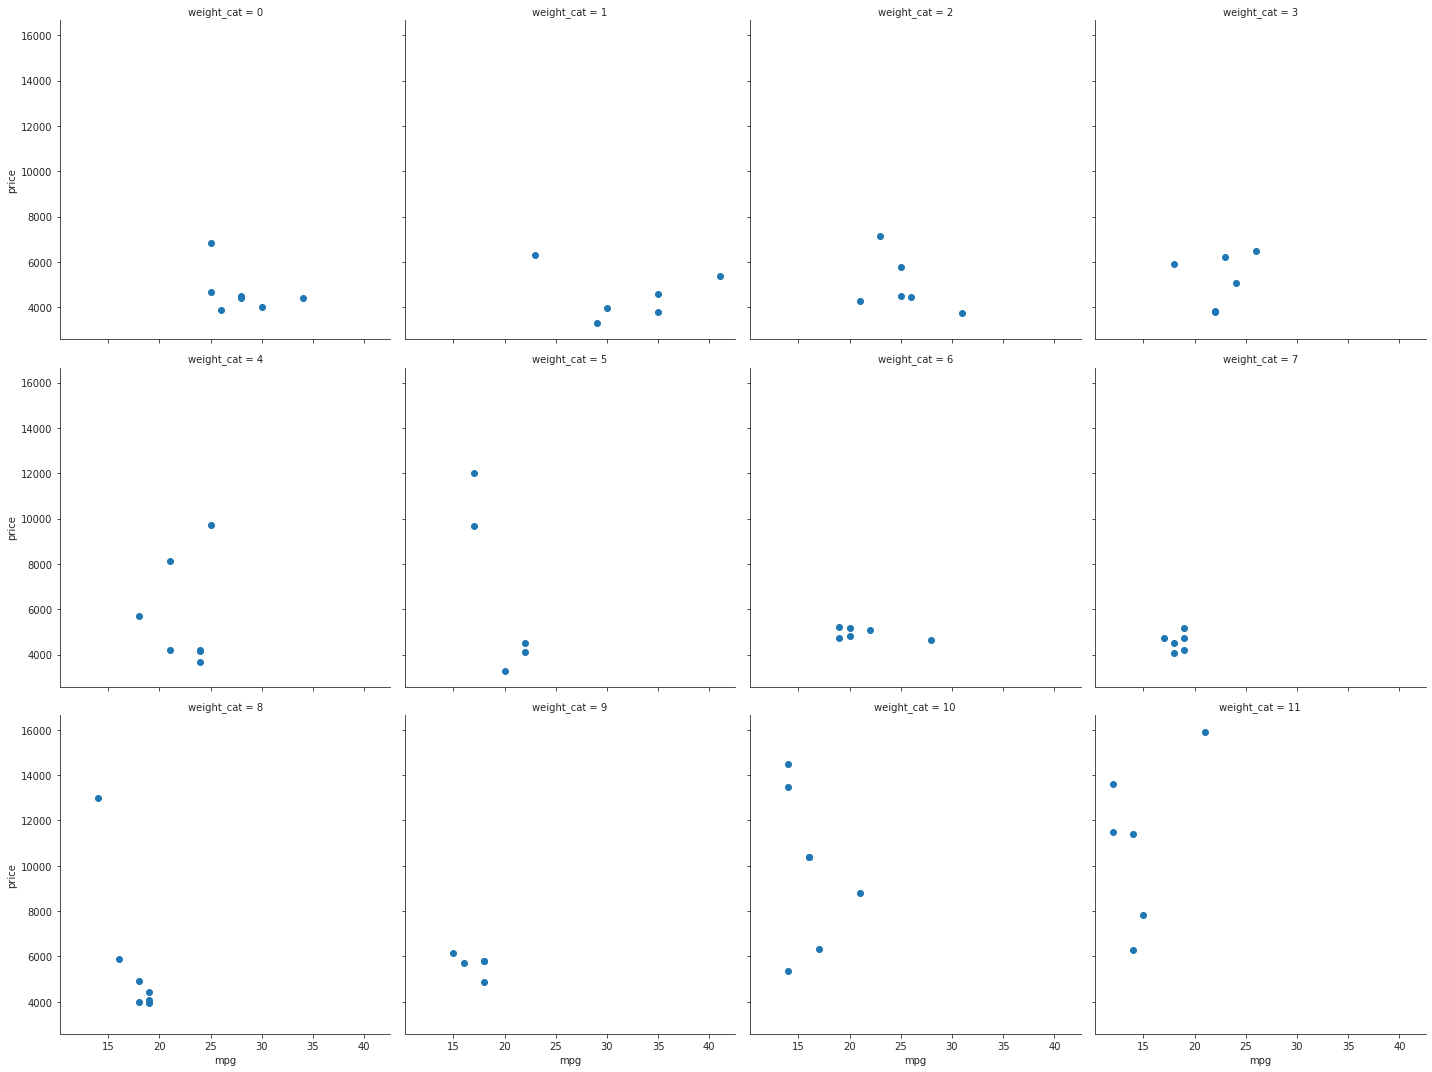

In [32]:
g = sns.FacetGrid(df_auto, col="weight_cat", col_wrap=4, size=5)
g.map(plt.scatter,"mpg", "price")

## Visualizações interativas com `Bokeh`

Uma biblioteca bacana para criar visualizações interativas de Pandas DataFrames é o `Bokeh`: <http://bokeh.pydata.org/en/latest/>

A instalação é melhor usando: `conda install bokeh`

Para a documentação detalhada, consulte: <http://bokeh.pydata.org/en/0.11.0/docs/user_guide/charts.html#making-high-level-charts>

**Nota:** Estes gráficos não serão exibidos no GitHub. Alguns gráficos mostrarão se você os mostrar via `nbviewer`:
<https://nbviewer.jupyter.org/github/TiesdeKok/PythonAccountingResearch/blob/master/3_visualizing_data.ipynb>

In [33]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

In [34]:
output_notebook()

Loading BokehJS ...

## Alguns exemplos

**Nota:** recentemente, a sintaxe do Bokeh mudou bastante, portanto, certifique-se de usar a versão mais recente e a documentação mais recente!

### Gráfico de barras

In [35]:
p = figure(plot_width=600, plot_height=400, title="Average MPG by Weight")
p.vbar(x='weight_cat', top='mpg', width=0.5, source=df_auto)
p.yaxis.axis_label = 'Average mpg'
p.xaxis.axis_label = 'Weight category'
show(p)

### Gráfico simples de pontos dispersos 

In [36]:
p = figure(plot_width=600, plot_height=400, title="Length vs Trunk")
p.scatter(source=df_auto, x='trunk', y='length', size=10)
p.xaxis.axis_label = 'Trunk size'
p.yaxis.axis_label = 'Car length'
show(p)

### Gráfico de dispersão onde você pode passar o mouse sobre um ponto para ver detalhes

In [37]:
from bokeh.models import HoverTool

hover = HoverTool(tooltips=[
    ("Na,e", "@make"),
    ("(x,y)", "($x, $y)"),
    ("Origin:", "@foreign"),
])

In [38]:
p = figure(plot_width=600, plot_height=400, title="Length vs Trunk", tools=[hover])
p.scatter(source=df_auto, x='trunk', y='length', size=10)
p.xaxis.axis_label = 'Trunk size'
p.yaxis.axis_label = 'Car length'
show(p)

## Adicionar componentes interativos à figura do "Bokeh"

O exemplo abaixo é apenas um exemplo divertido para mostrar coisas legais que você pode fazer quando combina o Notebook Juputer com `ipywidgets` e` bokeh`.

Se você gosta de "hackear" então o `ipywidgets` é uma ótima maneira de passar o tempo, mas por outro lado eu não o recomendo, pois não é muito fácil de usar.

### Mostrar gráfico de dispersão para uma marca, com um menu suspenso para alterar a marca

In [39]:
from ipywidgets import interact

In [40]:
def create_plot(brand='AMC'):
    data_df = df_auto[df_auto.brand == brand]
    p = figure(plot_width=600, plot_height=400, title="Length vs Trunk")
    p.xaxis.axis_label = 'Trunk size'
    p.yaxis.axis_label = 'Car length'
    p.scatter(source=data_df, x='trunk', y='length', size=10)
    show(p)

Nós só queremos incluir marcas com mais de um modelo de carro:

In [41]:
brand_list = list(df_auto.groupby('brand').filter(lambda x: len(x) > 1).brand.unique())

Mostre o gráfico com o menu suspenso interativo:

In [42]:
interact(create_plot, brand=brand_list)

interactive(children=(Dropdown(description='brand', options=('AMC', 'Buick', 'Cad.', 'Chev.', 'Dodge', 'Ford',…

<function __main__.create_plot(brand='AMC')>